In [135]:
# install tensiometer
# install camb
# install getdist
# install cobaya
# install bilby

In [136]:
import matplotlib as mpl
import os
import matplotlib.pyplot as plt

os.environ['PATH'] = r'/farmdisk1/cosmology/Libraries/texlive/2024/bin/x86_64-linux' #+ os.environ['PATH']
# Enable LaTeX in Matplotlib
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', serif='Computer Modern Roman')
mpl.rcParams['text.latex.preamble'] = r'''
    \usepackage{amsmath}  % Se necessario
    \newcommand{\sfont}[1]{{\scriptscriptstyle\rm #1}}  % Definizione di \sfont
'''

In [137]:
# initial imports:
import sys, os
import matplotlib.pyplot as plt

# getdist imports:
from getdist import plots, MCSamples

# tensiometer local imports:
here = os.path.dirname(os.getcwd())
tensiometer_path = os.path.join(here, 'tensiometer')
sys.path.append(tensiometer_path)

import tensiometer
print('Tensiometer version:', tensiometer.__version__)
print('Tensiometer path:', tensiometer.__path__)

Tensiometer version: 1.0.2
Tensiometer path: ['/farmdisk1/emaragliano/miniconda3/envs/cobaya_env/lib/python3.10/site-packages/tensiometer']


In [138]:
# chains paths:

chains_dir = os.path.join('chains')

In [139]:
# getdist settings:

getdist_settings = {
    'smooth_scale_1D': 0.3,
    'smooth_scale_2D': 0.4,
    'boundary_correction_order': 1,
    'mult_bias_correction_order': 1,
    }

In [140]:
# import chain
from cobaya import load_samples

name = '04p1_LCDM_CMB_BAO_SN'
chain = load_samples(os.path.join(chains_dir, name), skip=0.3, to_getdist=True)
chain.label = name
chain.root = os.path.join(chains_dir, name)
chain.updateSettings(getdist_settings)
chain.updateBaseStatistics()
chain.getConvergeTests()
print(chain.label+': R =', round(chain.GelmanRubin, 4))

INFO:samplecollection:Loaded 3424 sample points from 'chains/04p1_LCDM_CMB_BAO_SN.1.txt'


[samplecollection] Loaded 3424 sample points from 'chains/04p1_LCDM_CMB_BAO_SN.1.txt'


INFO:samplecollection:Loaded 3388 sample points from 'chains/04p1_LCDM_CMB_BAO_SN.2.txt'


[samplecollection] Loaded 3388 sample points from 'chains/04p1_LCDM_CMB_BAO_SN.2.txt'


INFO:samplecollection:Loaded 3396 sample points from 'chains/04p1_LCDM_CMB_BAO_SN.3.txt'


[samplecollection] Loaded 3396 sample points from 'chains/04p1_LCDM_CMB_BAO_SN.3.txt'


INFO:samplecollection:Loaded 3364 sample points from 'chains/04p1_LCDM_CMB_BAO_SN.4.txt'


[samplecollection] Loaded 3364 sample points from 'chains/04p1_LCDM_CMB_BAO_SN.4.txt'
04p1_LCDM_CMB_BAO_SN: R = 0.0085


In [141]:
BestFit = chain.getBestFit()

In [142]:
BestFitDict = BestFit.getParamDict()

In [143]:
chain.getParamNames().list()

['H0',
 'logA',
 'ns',
 'ombh2',
 'omch2',
 'tau',
 'A_planck',
 'P_act',
 'A',
 'As',
 'DHBBN',
 'YHe',
 'Y_p',
 'age',
 'clamp',
 'omega_de',
 'omegam',
 'omegamh2',
 'rdrag',
 's8h5',
 'S8',
 'S8_optimal',
 's8omegamp25',
 'sigma8',
 'thetastar',
 'zrei',
 'A_act',
 'chi2__BAO',
 'chi2__CMB',
 'chi2__SN',
 'minuslogprior',
 'minuslogprior__0',
 'chi2',
 'chi2__act_dr6_cmbonly.PlanckActCut',
 'chi2__act_dr6_cmbonly.ACTDR6CMBonly',
 'chi2__planck_2018_lowl.TT',
 'chi2__planck_2020_lollipop.lowlEB',
 'chi2__bao.desi_dr2.desi_bao_all',
 'chi2__sn.desy5']

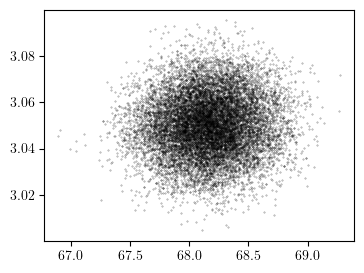

In [144]:
plt.figure(figsize=(4, 3))
plt.scatter(chain.samples[:, 0], chain.samples[:, 1], s=0.1, c='k', alpha=0.5)

Only two pars with small CDE

[root] *WARNING* fine_bins_2D not large enough for optimal density: H0, omch2


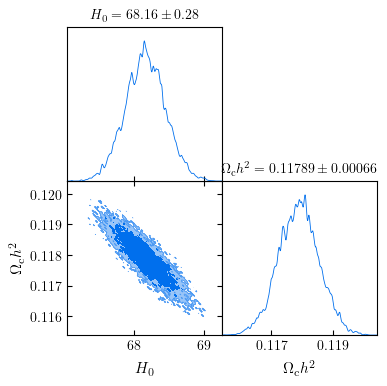

In [145]:
g = plots.get_subplot_plotter()
getdist_settings['smooth_scale_1D'] = 0.05
getdist_settings['smooth_scale_2D'] = 0.05
chain.updateSettings(getdist_settings)
chain.updateBaseStatistics()

g.settings.axes_fontsize = 13
g.triangle_plot(
    [chain],
    params=['H0','omch2'],
    filled=True,
    title_limit=1, # first title limit (for 1D plots) is 68% by default

)

g.export('plots/LCDM_triangle_plot_smooth_0p05.pdf', dpi=300)

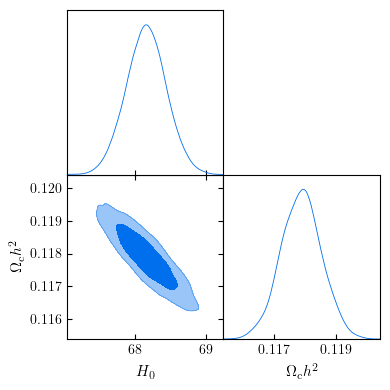

In [146]:
g = plots.get_subplot_plotter()
getdist_settings['smooth_scale_1D'] = 0.3
getdist_settings['smooth_scale_2D'] = 0.3
chain.updateSettings(getdist_settings)
chain.updateBaseStatistics()

g.settings.axes_fontsize = 13
g.triangle_plot(
    [chain],
    params=['H0','omch2'],
    filled=True,
)

g.export('plots/LCDM_triangle_plot_smooth_0p3.pdf', dpi=300)

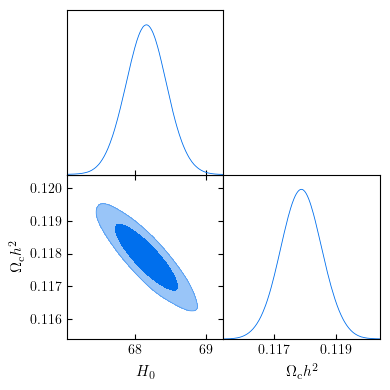

In [147]:
g = plots.get_subplot_plotter()
g.settings.axes_fontsize = 13
getdist_settings['smooth_scale_1D'] = 0.6
getdist_settings['smooth_scale_2D'] = 0.6
chain.updateSettings(getdist_settings)
chain.updateBaseStatistics()


g.triangle_plot(
    [chain],
    params=['H0','omch2'],
    filled=True,
)

g.export('plots/LCDM_triangle_plot_smooth_0p6.pdf', dpi=300)

All LCDM parameters

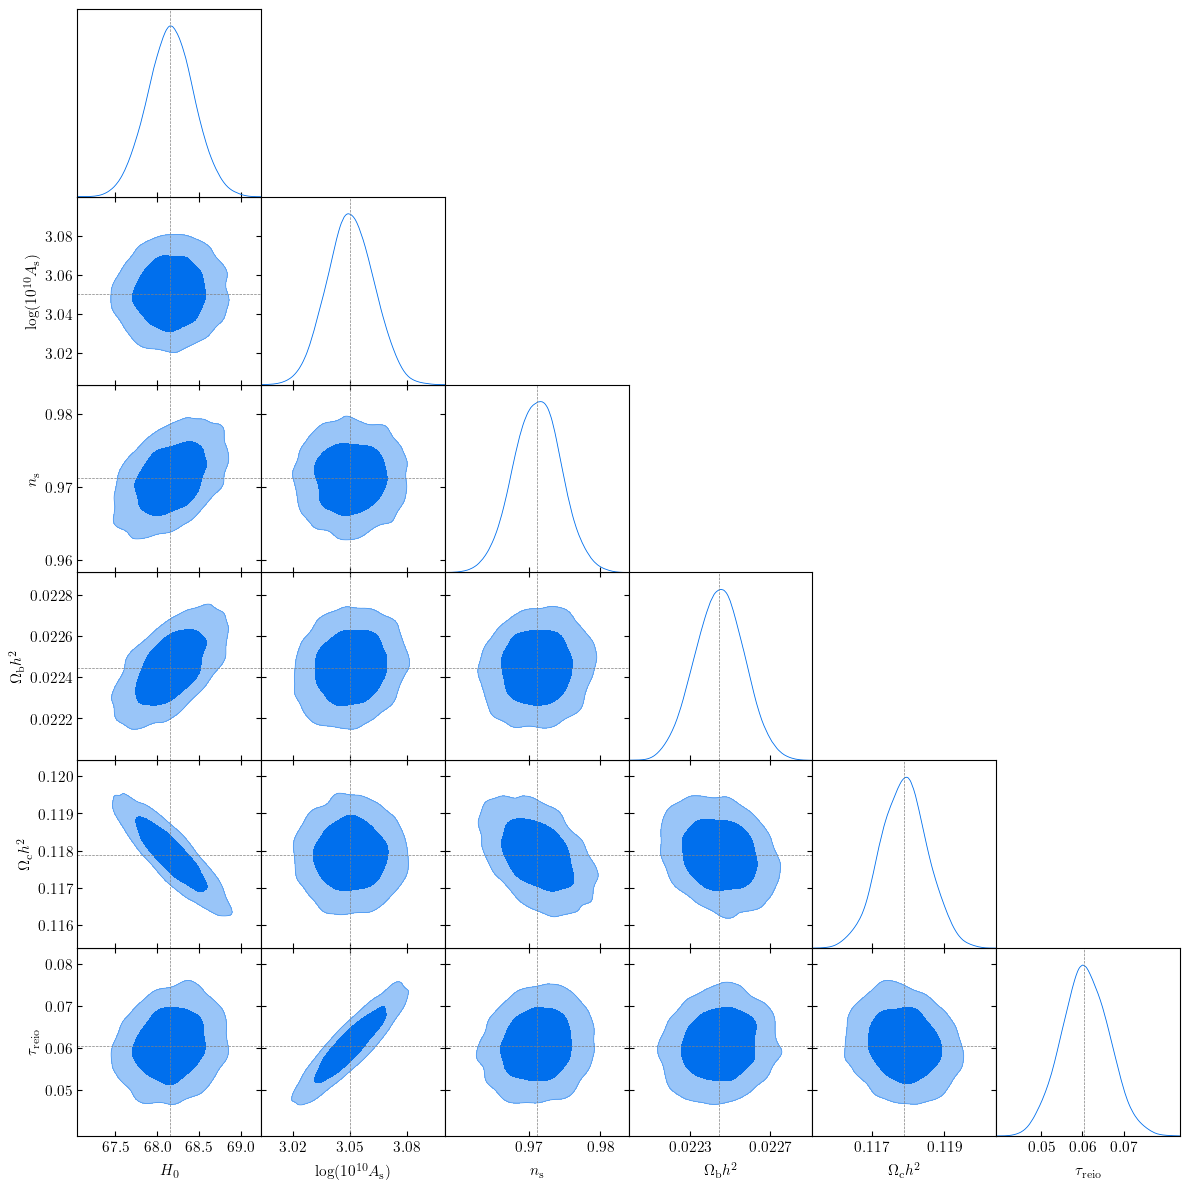

In [158]:
g = plots.get_subplot_plotter()
g.settings.axes_fontsize = 14
getdist_settings['smooth_scale_1D'] = 0.3
getdist_settings['smooth_scale_2D'] = 0.3
chain.updateSettings(getdist_settings)
chain.updateBaseStatistics()

g.triangle_plot(
    [chain],
    params=['H0','logA',  'ns','ombh2','omch2','tau'],
    filled=True,
    markers=BestFitDict,
)

g.export('plots/LCDM_triangle_plot_all_04p1_LCDM_CMB_BAO_SN.pdf', dpi=300)

    

In [149]:
# rebuild the model:
from cobaya.model import get_model
import yaml

# define the path to the YAML parameters file:
yaml_params = os.path.join(chains_dir, name + '.input.yaml')
# load the parameters from the YAML file:
with open(yaml_params, 'r') as f:
    params_dict = yaml.safe_load(f)
# remove the 'path' key from the 'camb' dictionary if it exists:
if 'path' in params_dict.get('theory', {}).get('camb', {}):
    del params_dict['theory']['camb']['path']
if 'recombination_model' in params_dict.get('theory', {}).get('camb', {}).get('extra_args', {}):
    del params_dict['theory']['camb']['extra_args']['recombination_model']

# build the model:
model = get_model(params_dict)

[model] *WARNING* Ignored blocks/options: ['sampler', 'output']


INFO:camb:`camb` module loaded successfully from /mnt/project_mnt/farm_fs/emaragliano/cobaya-cosmolody-data/code/CAMB/camb


[camb] `camb` module loaded successfully from /mnt/project_mnt/farm_fs/emaragliano/cobaya-cosmolody-data/code/CAMB/camb


/farmdisk1/emaragliano/miniconda3/envs/cobaya_env/lib/python3.10/site-packages/sacc/sacc.py:935: UserWarning: The FITS format without the 'sacc_ordering' column is deprecated. Assuming data rows are in the correct order as it was before version 1.0.
  warnings.warn(
INFO:planck_2020_lollipop.lowleb:Initialized!


[planck_2020_lollipop.lowleb] Initialized!


INFO:bao.desi_dr2.desi_bao_all:Initialized.


[bao.desi_dr2.desi_bao_all] Initialized.


In [150]:
#model.__dict__